# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: Ziqi Wei

**ID**: zw698

> **Due Date**
>
> Friday, 9/8/23, 9:00pm

## Overview

### Instructions

-   Problems 1-3 consist of a series of code snippets for you to
    interpret and debug. For Problems 1 and 2, you will be asked to
    identify relevant error(s) and fix the code. For Problem 3, the code
    works as intended; your goal is to identify the code’s purpose by
    following its logic.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [38]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `e:\Whisky\2023autumn\cornell\BEE4750\HW1whisky\hw01-alcohol-freeWhisky`


In [39]:
using Plots
using GraphRecipes
using LaTeXStrings

## Problems (Total: 40 Points)

### Problem 1 (8 points)

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [40]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0


#### Problem 1.1 (3 points)

Describe the logic error.

In the line 2 of this function, it defines min_value = 0. This means the final result is the smaller one between 0 and the minimun of the array. If all the numbers in the array are bigger than 0, then the function will return 0, which is not the minimum of the array.

#### Problem 1.2 (3 points)

Write a fixed version of the function.

In [41]:
function minimum(array)
    min_value = array[1]
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end


minimum (generic function with 1 method)

#### Problem 1.3 (2 points)

Use your fixed function to find the minimum value of `array_values`.

In [42]:
array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values)

minimum(array_values) = 78


78

### Problem 2 (8 points)

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [43]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

average_grade = 94.4


#### Problem 2.1 (3 points)

Describe the logic and/or syntax error.

The function 'class_average' is not referenced when getting the value of 'average_grade'.
The name of the parameter in the function 'class_average' is different from that in the function 'mean'. So the function mean cannot use the given array 'student_grade' as the paramenter.
In the other word, 'average_grade' is not defined in the function.
Also, the Statistics package has not been included.

#### Problem 2.2 (3 points)

Write a fixed version of the code.

In [44]:
using Statistics
function class_average(student_grades)
  average_grade = mean(student_grades)
  return average_grade
end

class_average (generic function with 1 method)

#### Problem 2.3 (2 points)

Use your fixed code to compute the average grade for the class.

In [45]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
average_grade = class_average(student_grades)
@show average_grade;

average_grade = 94.4


### Problem 3 (8 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [46]:
function mystery_function(values)
    y = []
    for v in values
        if !(v in y)
            append!(y, v)
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


#### Problem 3.1 (4 points)

Explain the purpose of `mystery_function`.

It can be used to get an array of most elements from the original array without duplicate elements.
In the other world, it selects all the non-repeating elements from the given array as a new array.

#### Problem 3.2 (4 points)

Add comments to the code, explaining why and how it works. Refer to
[“Best Practices for Writing Code
Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
and remember that bad comments can be just as bad as no comments at all.
You do not need to add comments to every line (in fact, this is very bad
practice), but you should note the *purpose* of every “section” of code,
and add comments explaining any code sequences that you don’t
immediately understand.

In [47]:
function mystery_function(values) #Define a function to selects all the non-repeating elements from the given array as a new array.
    y = []
    for v in values #Iterate over the array.
        if !(v in y)
            append!(y, v) #Add a non-repeating element to the new array and neglect the repeating one.
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values); #As for the given array, using the function to obtain a new array.

mystery_function(list_of_values) = Any[1, 2, 3, 4]


### Problem 4 (16 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

#### Problem 4.1 (3 points)

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

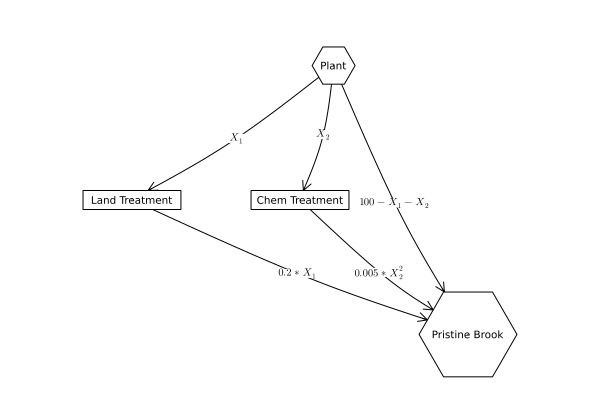

In [48]:
using GraphRecipes, Plots

A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"X_1", (1,3) => L"X_2", (1, 4) => L"100 - X_1 - X_2",(2, 4) => L"0.2*X_1",(3, 4) => L"0.005 * X_2^2")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)

#### Problem 4.2 (4 points)

Formulate a mathematical model for the treatment cost and the amount of
YUK that will be discharged into Pristine Brook based on the wastewater
allocations. This is best done with some equations and supporting text
explaining the derivation. Make sure you include, as additional
equations in the model, any needed constraints on relevant values. You
can find some basics on writing mathematical equations using the LaTeX
typesetting syntax
[here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
and a cheatsheet with LaTeX commands can be found on the course
website’s [Resources
page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

Let the treatment cost be $W(X_1, X_2)$, and the amount of YUK be $A(X_1, X_2)$.

The treatment cost caused by Method 1 is $W_1(X_1) = X_1^{2} / 20$. The treatment cost caused by Method 2 is $W_2(X_2) = 1.50 * X_2$. So the treatment cost is:

$$W(X_1, X_2) = W_1(X_1) + W_2(X_2) = X_1^{2} / 20 + 1.50 * X_2$$

The amount of YUK caused by Method 1 is $A_1(X_1) = 1 * 0.2 * X_1$. The amount of YUK caused by Method 2 is $A_2(X_2) = 1 * 0.005X_2^{2}$. The "1" represents the concentration of YUK. So the The amount of YUK is:

$$A(X_1, X_2) = A_1(X_1) + A_2(X_2) + 1 * (100 - X_1 - X_2) = 0.2 * X_1 +  0.005X_2^{2} + (100 - X_1 - X_2) = 100 - 0.8 * X_1 - X_2 + 0.005 * X_2^{2}$$

#### Problem 4.3 (4 points)

Implement this systems model as a Julia function which computes the
resulting YUK concentration and cost for a particular treatment plan.
You can return multiple values from a function with a
[tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1), as
in:

In [49]:
function multiple_return_values(x, y)
    A = 100 - 0.8 * x - y + 0.005 * y^2 #A is the amount of YUK discharged into Pristine Brook.
    W = x^2 / 20 + 1.50 * y #W is the treatment cost.
    return (A, W) #Use the function in 4.2.
end

A, W = multiple_return_values(2, 5)
@show A;
@show W;

A = 93.525
W = 7.7


Make sure you comment your code appropriately to make it clear what is
going on and why.

#### Problem 4.4 (5 points)

Use your function to experiment with some different combinations of
wastewater discharge and treatment. Can you find one that satisfies the
YUK effluent standard? What was the cost? You don’t have to find an
“optimal” solution to this problem, but what do you think would be
needed to find a better solution?

In [50]:
A1, W1 = multiple_return_values(100, 0)
@show A1;
@show W1;

A1 = 20.0
W1 = 500.0


In [51]:
A2, W2 = multiple_return_values(0, 100)
@show A2;
@show W2;

A2 = 50.0
W2 = 150.0


In [52]:
A3, W3 = multiple_return_values(50, 50)
@show A3;
@show W3;

A3 = 22.5
W3 = 200.0


In [53]:
A4, W4 = multiple_return_values(90, 10)
@show A4;
@show W4;

A4 = 18.5
W4 = 420.0


In [54]:
A5, W5 = multiple_return_values(90, 9)
@show A5;
@show W5;

A5 = 19.405


W5 = 418.5


By testing 5 combinations, we find there are more than one results complying with the emission standard. List three satisfying results as follows:

First, $X_1 = 100$ and $X_2 = 0$, which has a amount of YUK of 20kg, and a cost of $500.

Second, $X_1 = 90$ and $X_2 = 10$, which has a amount of YUK of 18.5kg, and a cost of $420.

Third, $X_1 = 90$ and $X_2 = 9$, which has a amount of YUK of 19.405kg, and a cost of $418.5.

There are some points needed attention: We ought to consider about the efficiency changes with allocation. For example, when &X_2$ is big, it may cause the decay of efficiency. At the same time, the cost will be impacted: as for the same wastewater, Method 1 will cause more cost (It is quadratic with the amount of water).

Also, it is a good choice to find a satisfying result with $X_1 + X_2 = 100$( the amount of YUK less than 20kg), and then reduce &X_1$ or &X_2$ to get a lower cost.

## References

List any external references consulted, including classmates.

https://blog.51cto.com/u_15181342/5354953

https://blog.csdn.net/six_gods/article/details/112658088

https://vimsky.com/examples/usage/julia-base-collections-Base.append-49ff8d523cc1ddee-jl.html